<h1><center>Mini-Projet de statistiques réalisé par SALIMA ZARIOUH</center></h1>


## Importation des librairies nécessaires

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc

## Exercice 1: Exploration des données et recherche de leur loi
### Q1 : Formation du vecteur des couts

In [184]:
# On utilise pandas pour récupérer les données des accidents nucléaires en lisant le fichier csv
data = pd.read_csv('NuclearPowerAccidents2016.csv')
data.shape

(216, 8)

On remarque que notre dataframe contient 8 colonnes et 216 lignes.

In [185]:
# On utilise la fonction head() qui affiche par défaut les 5 premiéres lignes pour savoir la structure de dataframe
data.head()

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,4/26/1986,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056
1,3/11/2011,"Fukushima Prefecture, Japan",166089.0,7.0,7.5,A,An earthquake and tsunami caused emergency bac...,573
2,12/8/1995,"Tsuruga, Japan",15500.0,NaN,NaN,A,Japan's only fast breeder reactor Monju suffer...,0
3,3/28/1979,"Middletown, Pennsylvania, United States",10910.0,5.0,7.9,NaN,Equipment failure and operator error contribut...,0
4,9/11/1957,"Rocky Flats, USA",8189.0,5.0,5.2,NaN,Fire starts and destroys plutonium processing ...,0


In [186]:
# On affiche les colonnes de notre dataframe avec le type des données de chaque colonne
data.dtypes

Date                        object
Location                    object
Cost (millions 2013US$)    float64
INES                       float64
Smyth Magnitude            float64
Region                      object
Description                 object
Fatalities                   int64
dtype: object

On remarque que la colonne Date est de type objet( String ).

In [187]:
#On convertit le type de la colonne Date au type Date pour faire la comparaison avec la date de l'accident de Three Mile Island 
data['Date'] = pd.to_datetime(data['Date'])

In [188]:
# On ne grade que les lignes des accidents (strictement) avant l’accident de Three Mile Island
date_accident = pd.to_datetime('3/28/1979')
data = data[data['Date'] < date_accident]
# On supprime les lignes où le cout est non renseigné
data = data.dropna(subset=['Cost (millions 2013US$)'])

In [189]:
# Ainsi on peut construire le vecteur des couts 
couts_accidents= data['Cost (millions 2013US$)']
couts_accidents.to_numpy()
# On s'assure que le nombre des observations est bien 55
print("Le nombre des observations vaut bien %d." % len(couts_accidents))

Le nombre des observations vaut bien 55.


In [190]:
#Affichons le vecteur des couts
couts_accidents

4      8189.0
5      4400.0
6      3500.0
7      2900.0
8      2500.0
10     1964.5
11     1900.0
12     1733.4
13     1500.0
14     1330.0
15     1300.0
17     1100.0
18     1100.0
21      990.0
24      800.0
25      793.9
26      788.4
29      541.4
30      511.5
33      425.2
38      277.1
41      180.0
44      150.0
52      100.0
53      100.0
54       99.5
55       98.0
56       89.9
58       87.7
60       84.5
62       77.0
70       60.1
73       52.4
86       38.0
87       37.5
95       25.7
96       25.7
101      17.1
103      16.1
106      15.0
108      13.9
115      11.8
121      11.4
130       6.1
135       4.4
157       1.2
158       1.1
161       0.0
162       0.0
163       0.0
164       0.0
165       0.0
166       0.0
167       0.0
168       0.0
Name: Cost (millions 2013US$), dtype: float64

### Q2: Construction d’un QQ-plot normal

#### a)  Montrons que la fonction quantile d’une loi normale vérifie la relation donnée:

On sait que la fonction quantile d'une loi de probabilité est l'inverse de sa fonction de répartition.<br>
 
Notons  $ X \sim N(\mu,\sigma^2)$ et $ X_{cr} \sim N(0,1)$ est la loi centrée réduite associée à $X$:
 
Notons $ F_{1} $ la fonction de répartition de $X$ et $ F_{2} $ celle de $ X_{cr}$ :

Soit $p \in ]0,1[$ et $x \in \mathbf{R}$: <br>

   $$ F_{1} (x)=p \implies P(X \le  x) = p  $$ 
   
   On a : $X_{cr} = \frac{X - \mu}{\sigma}$
   
   Alors on a: $$ P( \sigma X_{cr} + \mu \le  x) = P(X_{cv} \le  \frac{x - \mu}{\sigma} )  
   \implies F_{2}( \frac{x- \mu}{ \sigma})= p $$


   D'où  : $$  x= F_{1}^{-1}(p) \qquad \text{et} \quad  x= F_{2}^{-1}(p)\sigma +\mu $$
  

 Et sachant que: $$ F_{1}^{-1}(p)= F^{-1}(p,\mu,\sigma^2) \qquad \text{et} \quad F_{2}^{-1}(p)=F^{-1}(p,0,1)$$
 On peut déduire que: $$ \forall p \in ]0,1[,  F^{-1}(p,\mu,\sigma^2)= F^{-1}(p,0,1)\sqrt{\sigma^2}+\mu$$



#### b) Le QQ-plot de données pour la loi normale:

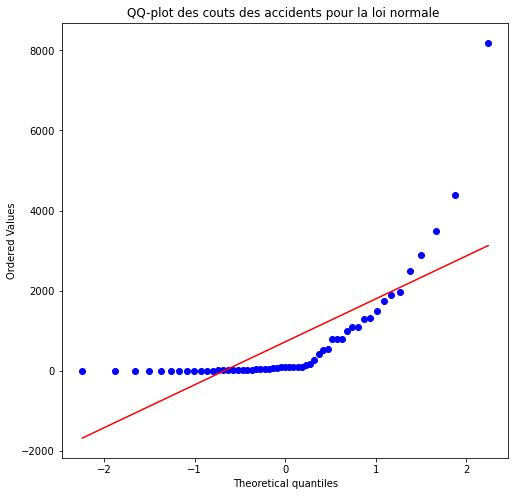

In [191]:
'''On a la fonction probplot de la librairie SciPy Génère un tracé de probabilité des données
d'échantillon par rapport aux quantiles d'une distribution théorique spécifiée:
Dans notre cas la distribution théorique est celle de la loi normale et les données sont les couts d'accidents formé dans Q1'''
figure = plt.figure(figsize=(8,8)) # On précise la taille de figure qu'on souhaite réaliser
x = figure.add_subplot(111) # 111 pour indiquer la grille 1x1
res = sc.probplot(couts_accidents, dist='norm', plot=x)
x.set_title("QQ-plot des couts des accidents pour la loi normale ")
plt.show()

### Q2: Construction d’un QQ-plot de données pour la loi exponentielle

#### a) Montrons que le quantile d’une loi exponentielle de paramètre λ respecte la relation donnée:

Notons  $ X \sim e(\lambda)$ et $ X_{u} \sim e(1)$ :
 
Notons $ F_{1} $ la fonction de répartition de $X$ et $ F_{2} $ celle de $ X_{u}$ :

Soit $p \in ]0,1[$ et $x \in R$: <br>

   $$ F_{1} (x)=p \implies P(X \le  x) = p  $$ 
   
   On a : $X_{u} = \lambda X$
   
   Alors on a: $$  P(\frac{X_{u}}{\lambda} \le x) = P(X_{u} \le \lambda x ) \implies F_{2}(\lambda x) = p $$


   D'où  : $$ x= F_{1}^{-1}(p) \qquad \text{et} \quad  x= \frac{1}{\lambda} F_{2}^{-1}(p)$$
  

 Et sachant que: $$ F_{1}^{-1}(p)= F^{-1}(p,\lambda) \qquad \text{et} \quad F_{2}^{-1}(p)=F^{-1}(p,1) $$
 On peut déduire que: $$ \forall p \in ]0,1[,  F^{-1}(p,\lambda)= \frac{1}{\lambda} F^{-1}(p,1) $$


#### b) Le QQ-plot de données pour la loi exponentielle:


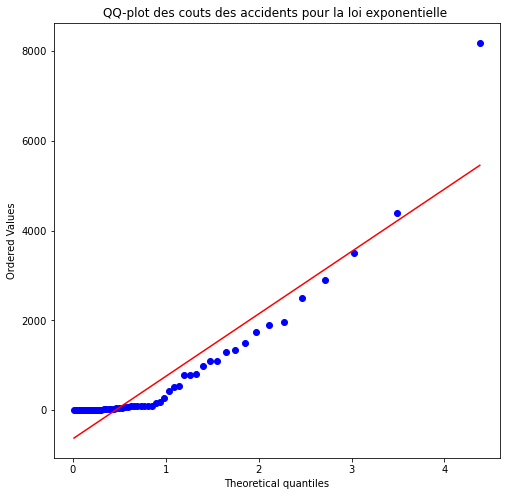

In [192]:
fig = plt.figure(figsize=(8,8))
x = fig.add_subplot(111)
res = sc.probplot(couts_accidents, dist='expon', plot=x)
x.set_title("QQ-plot des couts des accidents pour la loi exponentielle ")
plt.show()

### Q4 :Comparaison entre les deux QQ-plots

En s'appuyant sur les qq-plots obtenus, on peut déduire que la loi exponentielle est la plus plausible pour les données puisque la position des quantiles dans la population observée est trés proche à leurs position dans le cas d'une distribution exponentielle ce qui n'est pas le cas pour la loi normale.

## Exercice 2: Estimation ponctuelle des paramètres d’une loi exponentielle

### Q1: Calculons l’estimateur du maximum de vraisemblance $\hat{\lambda_{n}}$ :

On a : $X= (X_{1},X_{2}$,...,$X_{n}$) Avec les $ X_{i}$ sont indépendants entre eux et identiquement distribués:

D'où : $$ p(x ,\lambda)= \prod_{\substack{i=1}}^n p(x_{i},\lambda)$$
Et on sait que pour une loi exponentielle: $$p(x_{i},\lambda) = \lambda e^{-\lambda x_{i}}$$
D'où : $$ p(x ,\lambda)= \prod_{\substack{i=1}}^n \lambda e^{-\lambda x_{i}} = \lambda^n e^{-\lambda \sum\limits_{i=1}^n x_{i}}$$ <br>
Ce qui donne: $$  \log (p(x ,\lambda)) = n \log(\lambda) - \lambda \sum\limits_{i=1}^n x_{i} $$

Ainsi au maximum de vraissemblance, on a: $$ \frac{\partial \log{p(x ,\hat{\lambda_{n}} )}}{\partial \lambda} =0 \implies \frac{n}{\hat{\lambda_{n}}} - \sum\limits_{i=1}^n x_{i} =0$$
Et on a : $$\frac{\partial^2 \log{p(x ,\lambda )}}{\partial \lambda^2} = -\frac{n}{\lambda^2}<0$$

D'où $\hat{\lambda_{n}}$ est un maximum global de vraissemblance, ainsi l'estimateur de maximum de vraissemblance vaut: 

$$\hat{\lambda_{n}} = \frac{n}{\sum\limits_{i=1}^n x_{i}}$$
 

### Q2 : L'histogramme de données et la densité de probabilité de la loi exponentielle:

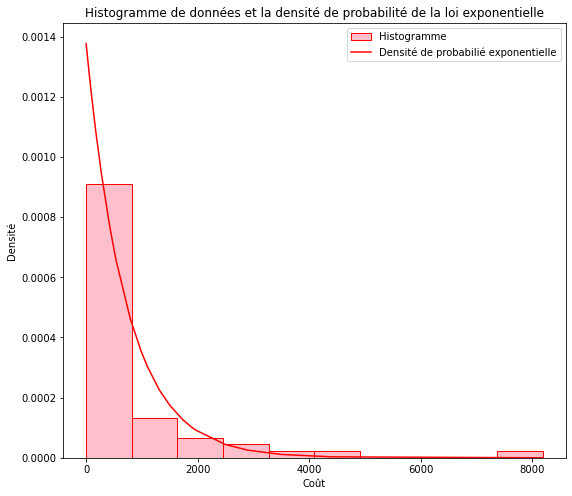

In [193]:
'''On commence par tracer l'histogramme de données en donnant au parametre de densité la valeur true 
pour tracer la densité de probabilité de chaque intervalle de cout'''
plt.figure(figsize=(9,8))
hist = plt.hist(couts_accidents,density=True,color="pink", edgecolor="red", label='Histogramme')
plt.title("Histogramme de données et la densité de probabilité de la loi exponentielle")
plt.xlabel("Coût")
plt.ylabel("Densité")
# On trace par la suite la densité de probabilité de la loi exponentielle avec la densité estimée λn
λn = len(couts_accidents)/sum(couts_accidents) # On utilise l'estimation trouvée dans la question précedente
plt.plot(couts_accidents, sc.expon.pdf(couts_accidents,scale=1/λn),color="red" ,label='Densité de probabilié exponentielle')
plt.legend()
plt.show()


### Q3 :  Montrons que la statistique $T_{1}(X)$ est un estimateur efficace pour $g_{1}(\lambda)$:

Pour montrer que $T_{1} (X) = \frac{1}{n}\sum\limits_{i=1}^n x_{i}$ est un estimateur efficace pour $ g_{1}(\lambda) = \frac{1}{\lambda}$ On doit montrer que: <br>
 $\qquad \quad  \bullet \quad T_{1} (X)$ est un estimateur sans biais : $$ \mathbb{E}_{\lambda} (T_{1} (X))=g_{1}(\lambda)= \frac{1}{\lambda}$$
    $\qquad  \bullet \quad$ La variance de $T_{1} (X)$ atteint la borne de Cramér-Rao :$$\mathbb{Var}_{\lambda}(T_{1} (X))=\frac{g_{1}'(\lambda)^{2} }{I(\lambda)} \qquad  \text {Avec } \quad I(\lambda) \text { est l'information de Fisher} $$
  
On a:  $$ \mathbb{E}_{\lambda} (T_{1} (X)) = \mathbb{E}_{\lambda}(\frac{1}{n}\sum\limits_{i=1}^n x_{i}) = \frac{1}{n} \sum\limits_{i=1}^n \mathbb{E}_{\lambda} (x_{i}) = \frac{1}{n} \sum\limits_{i=1}^n \frac{1}{\lambda} $$ 
D'où : $$ \mathbb{E}_{\lambda} (T_{1} (X)) = \frac{1}{\lambda} \implies T_{1} (X) \text { est bien un estimateur sans biais} $$

On a : $$\mathbb{Var}_{\lambda}(T_{1} (X))= \mathbb{Var}_{\lambda}(\frac{1}{n}\sum\limits_{i=1}^n x_{i}) = \frac{1}{n^2}\sum\limits_{i=1}^n \mathbb{Var}_{\lambda}(x_{i})= \frac{1}{n^2}\sum\limits_{i=1}^n \frac{1}{\lambda^2}  $$

D'où : $$ \mathbb{Var}_{\lambda}(T_{1} (X))= \frac{1}{n\lambda^2}$$
Et on a: $$g_{1}'(\lambda) = -\frac{1}{\lambda^2} \implies (g_{1}'(\lambda))^2= \frac{1}{\lambda^4}$$

Puisque $I(\lambda)=nI_1(\lambda) $ où $ I_1(\lambda) $ est l'information de fisher pour une seule observation et le modéle { $P_{\lambda},  \lambda > 0 $} est régulier et $\lambda \rightarrow p_{\lambda}(x) $ est deux fois differentiable, on a:


$$I(\lambda) = - n \mathbb{E}(\frac {\partial^{2} \log p_{\lambda}(x)}{\partial \lambda^{2}} ) \; et  \;  \log (p_{\lambda}(x)) = \log(\lambda) -\lambda x$$

D'où: $$ I(\lambda) = \frac{n}{\lambda^2} \implies \frac{g_{1}'(\lambda)^{2} }{I(\lambda)} = \frac{\lambda^2}{n}  \frac{1}{\lambda^4} =\frac{1}{n\lambda^2}  $$

Donc: $$\mathbb{Var}_{\lambda}(T_{1} (X))=\frac{g_{1}'(\lambda)^{2} }{I(\lambda)}$$

Conclusion : $$ T_{1} (X) \text{ est un estimateur efficace de }  g_{1}(\lambda)  $$

### Q4 : Calculons g1 en utilisant T1 pour l’échantillon donné:

In [194]:
T1= sum(couts_accidents)/len(couts_accidents)
print("g1 vaut alors: %f" %T1 )

g1 vaut alors: 726.336364


### Q5 : Trouvons les valeurs  η où la relation est vérifiée:

Soit $\lambda >0$, on a : $ \tilde{T_{1 , \eta}}(X) = \eta T_{1}(X) \qquad  \text{ Avec } \quad  T_{1}(X)=\frac{1}{n}\sum\limits_{i=1}^n x_{i}$ <br>
On a déja montré dans la question précédente que $ T_{1}$ est un estimateur sans biais avec : $$ \mathbb{Var}_{\lambda}(T_{1} (X))= \frac{1}{n\lambda^2}$$
D'où : $$R(\lambda, T_{1})= \frac{1}{n \lambda^2}$$
Et on a : $$R(\lambda,\tilde{T_{1 , \eta}}) = R(\lambda, \eta T_{1}(X)) = biais(\eta T_{1}(X))^2 + \mathbb{Var}_{\lambda}( \eta T_{1} (X))$$
Avec : $$\mathbb{Var}_{\lambda}( \eta T_{1} (X))= \eta^2 \mathbb{Var}_{\lambda}(T_{1} (X)) = \frac{\eta ^2}{n \lambda^2}$$
Et: $$ bais(\eta T_{1}(X))= E_{\lambda} \left(\frac{\eta}{n}\sum\limits_{i=1}^n x_{i} -\frac{1}{\lambda}\right) = \frac{\eta}{n} \sum\limits_{i=1}^n E_{\lambda}(x_{i}) -\frac{1}{\lambda} \qquad  \text{ Avec } \quad E_{\lambda}(x_{i}) =\frac{1}{\lambda}$$
D'où:  $$ biais(\eta T_{1}(X)) = \frac{\eta -1}{\lambda}$$

Alors, on a: $$R(\lambda,\tilde{T_{1 , \eta}})= \left( \frac{\eta -1 }{\lambda}\right) ^2 + \frac{\eta^2}{n \lambda^2}$$

Ainsi : $$R(\lambda,\tilde{T_{1 , \eta}}) <R(\lambda, T_{1})  \implies \left(\frac{\eta -1}{\lambda} \right)^2 + \frac{\eta^2}{n\lambda^2} < \frac{1}{n\lambda^2}\implies (\eta -1)^2 < \frac{1-\eta^2}{n}$$

On a : $(\eta -1)^2 > 0 \implies 1-\eta^2 >0 \implies \eta < 1 \quad  \text{ Ainsi en divisant les deux parties de l'inégalité par} \quad  1-\eta >0 $, on obtient: 
$$ 1-\eta < \frac{1+\eta}{n} \implies \eta \left(\frac{n+1}{n}\right) > \frac{n-1}{n} \implies \eta > \frac{n-1}{n+1} $$

Ainsi on conclut que l'inégalité est valide pour les valeurs de $\eta \in {\left ]\frac{n-1}{n+1},1 \right[}$

Le résultat trouvé n'est pas en contradiction avec la question précédente car meme si on a trouvé un estimateur dont l'erreur quadratique est inférieure à celui de $T_{1}(X)$ sur une intervalle donnée, cet estimateur n'est pas efficace vu qu'il est biaisé : Pour $\eta < 1$, on a: $biais( \tilde{T_{1 , \eta}}) >0$.

### Q6 : L'estimateur sans biais de la médiane:

Puisque la variable aléatoire X suit une loi exponenetielle de paramétre $\lambda$ ,la médiane vaut : $\frac{\ln(2)}{\lambda}$ <br>

Ainsi pour que $\tilde{T_{1 , \eta}}$ soit une loi sans biais de la médiane :
$$ E_{\lambda}(\tilde{T_{1 , \eta}}(X)) = \frac{\ln(2)}{\lambda} \implies \frac{\eta}{\lambda}= \frac{\ln(2)}{\lambda} \implies \eta= \ln(2) $$

##### Calculons l'estimateur $\tilde{T_{1 , \eta}} $ pour la valeur de  $\eta $ trouvée et le comparer avec la médiane empirique:

In [195]:
estimateur= np.log(2)*sum(couts_accidents)/len(couts_accidents) # On remplace 𝜂 par la valeur trouvée
print(" La valeur de l'estimateur de la médiane pour l'échantillon donné vaut : %f" %estimateur)
mediane= np.median(couts_accidents) # La valeur de la médiane empirique
print(" La valeur de la médiane empirique vaut : %f" %mediane)


 La valeur de l'estimateur de la médiane pour l'échantillon donné vaut : 503.458003
 La valeur de la médiane empirique vaut : 89.900000


On constate qu'il y a une différence importante entre la valeur de l'estimateur de médiane et celle de la médiane empirique.
Pour cette échantillon avec n=55, $\eta $ n'appartient pas à l'intervalle trouvé dans la question 5, d'où la valeur de risque est importante et cet estimateur n'est pas un bon estimateur.

### Q7 :  Comparons les risques quadratiques de $T_{1}(X) $ et  $\tilde{T_{1 , \eta}} $ en fonction de la taille de l'échantillon:

On a déja montré dans la question 5 que: 
$$R(\lambda, T_{1})= \frac{1}{n \lambda^2} \quad \text{et } \quad  R(\lambda,\tilde{T_{1 , \eta}})= \left( \frac{\eta -1 }{\lambda}\right) ^2 + \frac{\eta^2}{n \lambda^2}$$
Alors pour $\eta= \ln(2)$, on a : $$ R(\lambda, T_{1})= \frac{1}{n \lambda^2} \quad \text{et } \quad R(\lambda,\tilde{T_{1 , \eta}}) \approx \frac{0.0941587}{\lambda^2} + \frac{0.480453}{n\lambda^2} $$
Ainsi pour comparer les deux risques, il suffit de comparer : $$\frac{1}{n} \quad \text{et } \quad 0.0941587 + \frac{0.480453}{n} $$
D'où on a : $$R(\lambda,\tilde{T_{1 , \eta}}) <R(\lambda, T_{1}) \implies 0.0941587 + \frac{0.480453}{n}< \frac{1}{n} \implies n < 5,51778$$

Pour notre échantillon avec n=55, on a l'erreur quadratique moyenne de $T_{1}$ est plus petit que celui de $\tilde{T_{1 , \eta}}$, ainsi $T_{1}$ est un estimateur meilleur que $\tilde{T_{1 , \eta}}$ pour $\eta= \ln(2)$.

## Exercice 3:Test sur le paramètre d’une loi


### Q1: Formulons l'hypothése null et l'hypothése alternative:

On souhaite affirmer avec un faible risque d’erreur que le coût moyen d’un accident est inférieur à un milliard de dollars, d'où: <br>
L'hpothése null est : $$H_{0}=  \left\{ E_{\lambda}(X) < 1000 \right\} $$
Et puisque X suit une loi exponentielle de paramétre $\lambda $  :$$ H_{0}=  \left\{\frac{1}{\lambda}< 1000 , \lambda>0 \right\} =  \left\{\lambda > 0.001  \right\}$$
Et l'hypothése alternative vaut: $$ H_{1}=  \left\{ \frac{1}{\lambda} \ge 1000 ,\lambda>0 \right\} = \left\{ \lambda \le 0.001 ,\lambda>0 \right\} $$

### Q2 :  Donnons le test le plus puissant pour le niveau $\alpha$ en utilisant le principe de Neyman-Pearson:

On a : $$ L (x_{1},x_{2},...,\lambda) = \prod_{i=1}^{n} p_{\lambda}(x_{i}) =  \prod_{i=1}^{n} \lambda e^{-\lambda x_{i}} =\lambda^n  e^{-\lambda\sum\limits_{i=1}^n x_{i}}$$

Et on a d'aprés le théorème de Neyman-Pearson, le test le plus puissant pour le niveau $\alpha$ est défini par:

$$ \frac{L (x_{1},x_{2},...,\lambda_{0})}{L (x_{1},x_{2},...,\lambda_{1})} < K_{\alpha} \implies \left( \frac{\lambda_{0}}{\lambda_{1}} \right)^n  e^{-(\lambda_{0}-\lambda_{1})\sum\limits_{i=1}^n x_{i}}  < K_{\alpha} \implies   \left( \frac{\lambda_{0}}{\lambda_{1}} \right)^n  e^{-(\lambda_{0}-\lambda_{1}) T(X)}  < K_{\alpha} \quad \text{qui est croissante en  }  \quad T(X)=\sum\limits_{i=1}^n x_{i}$$

D'où: $$ T(X) > \frac{log\left(K_{\alpha}\left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n\right)}{\lambda_{1}-\lambda_{0}} = C_{\alpha}\quad \text{car } \qquad \lambda_{0} > \lambda_{1}  $$ 
et puisque les $ X_{i} $ suivent une loi exponenetielle et ils sont indépendants entre eux, alors :
$$ T(X) \sim \Gamma(n,\lambda)$$
Ainsi : $$\alpha = P(T(X) > C_{\alpha}) \qquad \text{Avec }  \qquad T(X) \sim \Gamma(n,\lambda) $$

### Q3: Appliquons le test pour l’échantillon considéré au niveau $\alpha$ = 0.05:

In [196]:
T = sum(couts_accidents) # On définit T pour notre échantillon
C = sc.gamma.ppf(a=55,q=0.95,scale=1000)
if T> C:
    print(" T se trouve dans la zone de rejet de l'hypothése H0 au niveau alpha=0.05")
else:
    print("On accepte l'hypothése H0 au niveau alpha=0.05, ainsi  on peut affirmer que le coût moyen d’accident "
          "est inférieur à un milliard de dollars")


On accepte l'hypothése H0 au niveau alpha=0.05, ainsi  on peut affirmer que le coût moyen d’accident est inférieur à un milliard de dollars


#### On calcule maintenant la valeur de p-valeur:

In [197]:
p_valeur = 1 - sc.gamma.cdf(T,a=55,scale=1000)
print("La valeur de p_valeur vaut %f " %p_valeur)

La valeur de p_valeur vaut 0.986283 


On trouve la valeur de p_valeur supérieure à 0,95 d'où $H_{0}$ ne peut pas etre rejetée et elle est acceptée.

### Q4: Traçons la densité de probabilité de T1 en indiquant la région du rejet au niveau α = 0.05:

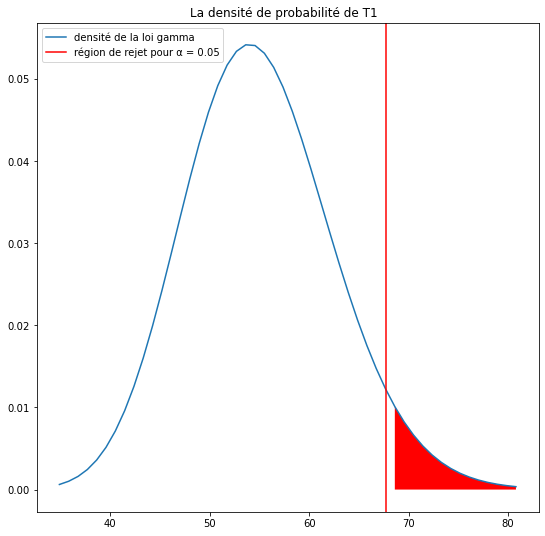

In [198]:
plt.figure(figsize=(9,9))
x=np.linspace(sc.gamma.ppf(0.001, a=55),sc.gamma.ppf(0.999, a=55))
y=sc.gamma.pdf(x, a=55) # la densité de probabilité
k=sc.gamma.ppf(0.95,a=55) # la quantile qui correspond à 0.95
plt.plot(x,y, label="densité de la loi gamma")
plt.fill_between(x[x >= k], y[x >= k], facecolor='red')
plt.axvline(x = k, color = "red", linestyle = "-", label="région de rejet pour α = 0.05")
plt.title("La densité de probabilité de T1  ")
plt.legend()
plt.show()

### Q5: Traçons la fonction puissance de test pour le niveau $\alpha$ donné:

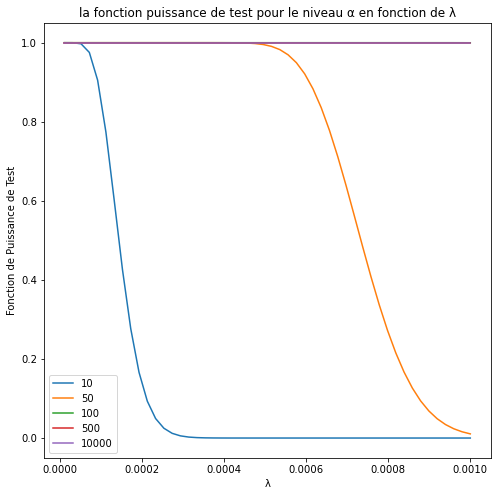

In [199]:
plt.figure(figsize=(8,8))
tailles = [10, 50, 100, 500, 10000]
x=np.linspace(0.00001,0.001) #car on s'interesse aux valeurs de lambda<0.001
k=sc.gamma.ppf(0.95,a=55,scale=1000) # retourne la quantille pour α =0.05
for n in tailles :
    y=1-sc.gamma.cdf(k,a=n,scale=1/x) # La puissance est mesurée par 1- (la fonction de répartition=cdf)
    plt.plot(x,y,label=n)
plt.xlabel("λ")
plt.ylabel("Fonction de Puissance de Test")
plt.title("la fonction puissance de test pour le niveau α en fonction de λ")
plt.legend()
plt.show()


#### Explication des résultats:

On constate que lorsque $\lambda$ tend vers 0.001, les puissances pour les grandes valeurs de n tendent vers 1.

### Q6: En utilisant le théorème centrale limite, donnons une approximation de la loi de T1:

On a :$T_{1} (X) = \frac{1}{n}\sum\limits_{i=1}^n x_{i}$ d'où $T_{1} (X)$ présente la somme des variables aléatoires qui suivent indépendament la meme loi: <br>
Ainsi d'aprés le théorème de centrale limite, pour les grandes valeurs de n on a : $T_{1} (X) \sim N (\mu, \sigma^2)$ <br>
Avec : $$ \mu = E(T_{1} (X)) = \frac{1}{\lambda} \quad \text{Et } \quad \sigma^2=  \mathbb{Var}_{\lambda}(T_{1} (X))= \frac{1}{n\lambda^2}$$
D'où: $$T_{1} (X) \sim N (\frac{1}{\lambda}, \frac{1}{n\lambda^2})$$

#### Proposons un nouveau test et donnons son résultat:

On a trouvé dans la question 2 que la zone de rejet de l'hypothése $H_{0}$ correspond à $ T(X)=\sum\limits_{i=1}^n x_{i} > C_{\alpha}$ <br>
Définissons la loi centrée réduite associée à $ T(X) \sim N (\frac{n}{\lambda_{0}}, \frac{n}{\lambda_{0}^2}) $:$$T_{cr}(X) = \frac{T(X)-\frac{n}{\lambda_0}}{\frac{\sqrt{n}}{\lambda_0}} \sim N(0,1)$$
On a : $$T(X) > C_{\alpha} \implies T_{cr}(X)> \frac{C_{\alpha}-\frac{n}{\lambda_0}}{\frac{\sqrt{n}}{\lambda_0}}$$
Ainsi $ \frac{C_{\alpha}-\frac{n}{\lambda_0}}{\frac{\sqrt{n}}{\lambda_0}}$ présente le quantille d'ordre $1-\alpha$ de la loi normale centrée réduite. $ $

In [200]:
C = sc.norm.ppf(0.95)*(np.sqrt(55)/0.001)+55/0.001 # On applique la relation trouvée avec n=55 et 𝜆0=0.001
if T> C:
    print(" T se trouve dans la zone de rejet de l'hypothése H0 au niveau alpha=0.05")
else:
    print("On accepte l'hypothése H0 au niveau alpha=0.05, ainsi  on peut affirmer que le coût moyen d’accident "
          "est inférieur à un milliard de dollars")

On accepte l'hypothése H0 au niveau alpha=0.05, ainsi  on peut affirmer que le coût moyen d’accident est inférieur à un milliard de dollars


<h2><center>FIN</center></h2>